<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prédiction prix d'une action

In [2]:
# charger les packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [6]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [10]:
training_set = dataset_train.iloc[:, 1:2].values # faire la prévision à partir de la valeur d'ouverture

## Data Normalisation

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Data structures with 60 ranges

In [12]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Adjust the format

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Neural Network

In [15]:
#Initialisation du réseau de neurones
regressor = Sequential()
# création couches 
#1
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#2
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#3
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#4
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Output 
regressor.add(Dense(units = 1))

In [16]:
#Compile
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#training
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 26s 115ms/step - loss: 0.0842
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0073
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0050
Epoch 13/100

## Dataset test

In [17]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


In [18]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [20]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [21]:
# getting predicted data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [22]:
predicted_stock_price

array([[789.51953],
       [786.42883],
       [786.5594 ],
       [787.9354 ],
       [791.2136 ],
       [796.9672 ],
       [801.9911 ],
       [803.4944 ],
       [803.07965],
       [802.35956],
       [802.03784],
       [802.01776],
       [802.2479 ],
       [803.26404],
       [804.67834],
       [809.80914],
       [817.1581 ],
       [824.65497],
       [828.2114 ],
       [823.0705 ]], dtype=float32)

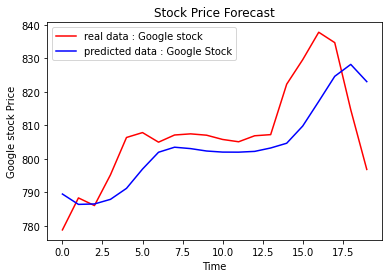

In [23]:
#V Dataviz 
plt.plot(real_stock_price, color = 'red', label = 'real data : Google stock ')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted data : Google Stock')
plt.title('Stock Price Forecast')
plt.xlabel('Time')
plt.ylabel('Google stock Price')
plt.legend()
plt.show()